In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [5]:
def get_datasets(std_size=False):
    # My python only likes absolute paths 
    brca = pd.read_csv('/Users/danielraad/Desktop/data/Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('/Users/danielraad/Desktop/data/Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    print('size brca, ovca', len(brca), len(ovca))
    if not std_size:
        print('normal size', len(brca)+len(ovca))
        df = pd.concat([brca, ovca[1:]])
    elif std_size:
        print('sampled size', len(ovca)+len(ovca))
        df = pd.concat([brca[0:len(ovca)], ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df
df = get_datasets()

size brca, ovca 1080 579
normal size 1659


/Users/danielraad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


1658 49554


In [6]:
#seperate the target variable from the other variables
from sklearn.model_selection import train_test_split
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_tests = train_test_split(X, y, random_state = 42, test_size = 0.33)

In [8]:
#Random Forest with PCA applied 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

x = 0.9999
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_pca = pca.transform(X)
pca = PCA(n_components=8)
pca.fit(X_train)
X_pca = pca.transform(X)
print('at', x, '% of the variance ======')
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
y_red = pd.Series(y)

df_redd = pd.DataFrame(X_pca)

X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)

cfamodel = RandomForestClassifier(n_estimators = 100,max_features = 'sqrt', n_jobs = -1, verbose = 1)

#checking the pruned model hyperparameters
best_model1 = RandomForestClassifier(bootstrap = False, n_jobs = -1, verbose = 1, max_depth = 65, max_features = 3, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 400)

cfamodel.fit(X_traind,y_traind)
best_model1.fit(X_traind, y_traind)

ctrain_rf_predictions = cfamodel.predict(X_traind)
ctrain_rf_probs       = cfamodel.predict_proba(X_traind)[:, 1]

train_best_model_predictions = best_model1.predict(X_traind)
best_model_predictions = best_model1.predict(X_testd)

crf_predictions = cfamodel.predict(X_testd)
crf_probs       = cfamodel.predict_proba(X_testd)[:, 1]
features = list(X_traind.columns)
print(crf_predictions)



at 0.9999 % of the variance ======
original shape:    (1658, 24776)
transformed shape: (1658, 8)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Paralle

[0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1]


In [9]:
## Evaluation
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[133   9]
 [ 10 263]]


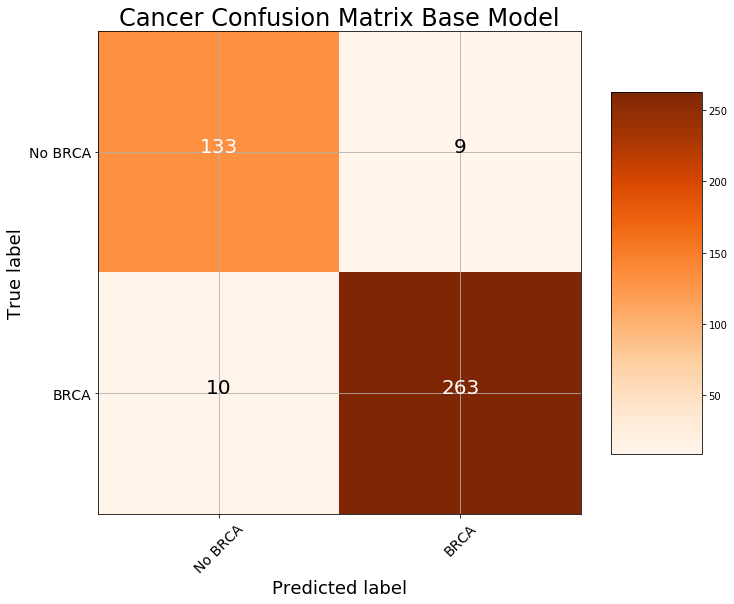

In [10]:
#Cancer confusion matrix for the pca base model with no hyperparameters
#finding the number of errors made on the test set 
cm = confusion_matrix(y_testd, crf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix Base Model')

Confusion matrix, without normalization
[[134   8]
 [  9 264]]


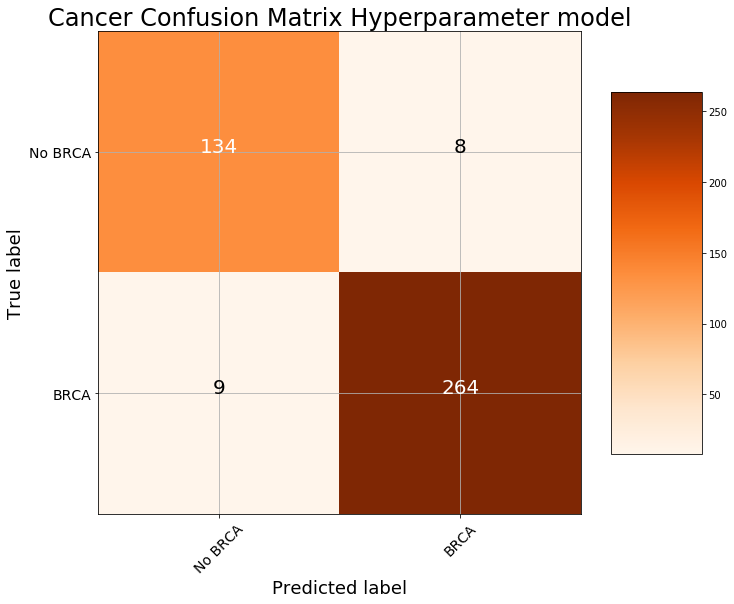

In [11]:
#Cancer confusion matrix for the pruned model, finding the number of errors made on the test set 
#interesting that the pruned hyperparameters do not work with PCA - what is the reason? 
cm = confusion_matrix(y_testd, best_model_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix Hyperparameter model')

In [12]:
#Scoring with kfold, base model with pca, interesting to see that the result is worse than normal random ensemble 
#what could the reason for this be? 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cfamodel,df_redd,y_red,cv=10,scoring='accuracy')
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent work

0.9595764877692587


In [13]:
#The most important features 

fi_model = pd.DataFrame({'feature': features,
                   'importance': cfamodel.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)


,feature,importance
0,0,0.627072
7,7,0.078527
4,4,0.061418
1,1,0.051499
2,2,0.051255
6,6,0.047507
3,3,0.042666
5,5,0.040056


In [14]:
mylist = pca.explained_variance_ratio_
print(mylist)

[0.07602589 0.06698894 0.05284982 0.03438046 0.02615995 0.0244393
 0.02145081 0.02005084]


In [15]:
print(abs(pca.components_))

[[0.00175953 0.0131273  0.00438633 ... 0.00756587 0.00231814 0.00231814]
 [0.00545911 0.00139111 0.02452068 ... 0.00086996 0.00612171 0.00612171]
 [0.0016138  0.00242584 0.0361731  ... 0.0007963  0.00046066 0.00046066]
 ...
 [0.00335189 0.0042581  0.0113034  ... 0.0060936  0.00642802 0.00642802]
 [0.00084972 0.00258198 0.00201525 ... 0.00177268 0.00243253 0.00243253]
 [0.00069259 0.00818556 0.00192172 ... 0.01299184 0.00178252 0.00178252]]


In [16]:
#Random Forest with PCA applied 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

valscores = []

for x in range(1,100):
    X_pca = pca.transform(X)
    pca = PCA(n_components=x)
    pca.fit(X_train)
    X_pca = pca.transform(X)
    y_red = pd.Series(y)

    df_redd = pd.DataFrame(X_pca)

    X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)

    cfamodel = RandomForestClassifier(n_estimators = 100,max_features = 'sqrt', n_jobs = -1, verbose = 1)
    cfamodel.fit(X_traind,y_traind)
    ctrain_rf_predictions = cfamodel.predict(X_traind)
    ctrain_rf_probs       = cfamodel.predict_proba(X_traind)[:, 1]
    crf_predictions = cfamodel.predict(X_testd)
    crf_probs       = cfamodel.predict_proba(X_testd)[:, 1]
    
    scores = cross_val_score(cfamodel,df_redd,y_red,cv=10,scoring='accuracy')
    valscores.append(scores.mean())


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

In [17]:
maxval = max(valscores)


In [18]:
cnt = 1
for x in valscores:
    if(x == maxval):
        print(cnt)
    else:
        cnt = cnt + 1 

9
